<a href="https://colab.research.google.com/github/ArijKouki/cheese-clustering/blob/main/TP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP N°4 : Apprentissage non supervisé : Clustering

## Partie 1 : Données de travail

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
fromage=pd.read_table("/content/drive/MyDrive/fromage1.txt",sep="\t",header=0,index_col=0)
fromage

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
Fromages,,,,,,,,,
CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20
Cantal,367,256.0,264.0,28.8,48.8,5.7,23.0,90,30
Chabichou,344,192.0,87.2,27.9,90.1,36.3,19.5,80,36
Chaource,292,276.0,132.9,25.4,116.4,32.5,17.8,70,25
Cheddar,406,172.0,182.3,32.5,76.4,4.9,26.0,110,28


In [ ]:
fromage.describe()

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,300.034483,210.086207,185.734483,24.158621,67.562069,13.010345,20.168966,74.586207,26.965517
std,91.914356,108.678923,72.528882,8.129642,24.163098,11.723339,6.959788,28.245755,11.318388
min,70.000000,22.000000,72.600000,3.400000,37.100000,1.200000,4.100000,10.000000,10.000000
25%,292.000000,140.000000,132.900000,23.400000,51.600000,4.900000,17.800000,70.000000,20.000000
50%,321.000000,223.000000,202.300000,26.300000,62.300000,6.400000,21.000000,80.000000,26.000000
75%,355.000000,276.000000,220.500000,29.100000,76.400000,21.100000,23.400000,90.000000,30.000000
max,406.000000,432.000000,334.600000,33.300000,150.500000,36.400000,35.700000,120.000000,51.000000


array([[<Axes: xlabel='calories', ylabel='calories'>,
        <Axes: xlabel='sodium', ylabel='calories'>,
        <Axes: xlabel='calcium', ylabel='calories'>,
        <Axes: xlabel='lipides', ylabel='calories'>,
        <Axes: xlabel='retinol', ylabel='calories'>,
        <Axes: xlabel='folates', ylabel='calories'>,
        <Axes: xlabel='proteines', ylabel='calories'>,
        <Axes: xlabel='cholesterol', ylabel='calories'>,
        <Axes: xlabel='magnesium', ylabel='calories'>],
       [<Axes: xlabel='calories', ylabel='sodium'>,
        <Axes: xlabel='sodium', ylabel='sodium'>,
        <Axes: xlabel='calcium', ylabel='sodium'>,
        <Axes: xlabel='lipides', ylabel='sodium'>,
        <Axes: xlabel='retinol', ylabel='sodium'>,
        <Axes: xlabel='folates', ylabel='sodium'>,
        <Axes: xlabel='proteines', ylabel='sodium'>,
        <Axes: xlabel='cholesterol', ylabel='sodium'>,
        <Axes: xlabel='magnesium', ylabel='sodium'>],
       [<Axes: xlabel='calories', ylabel='calc

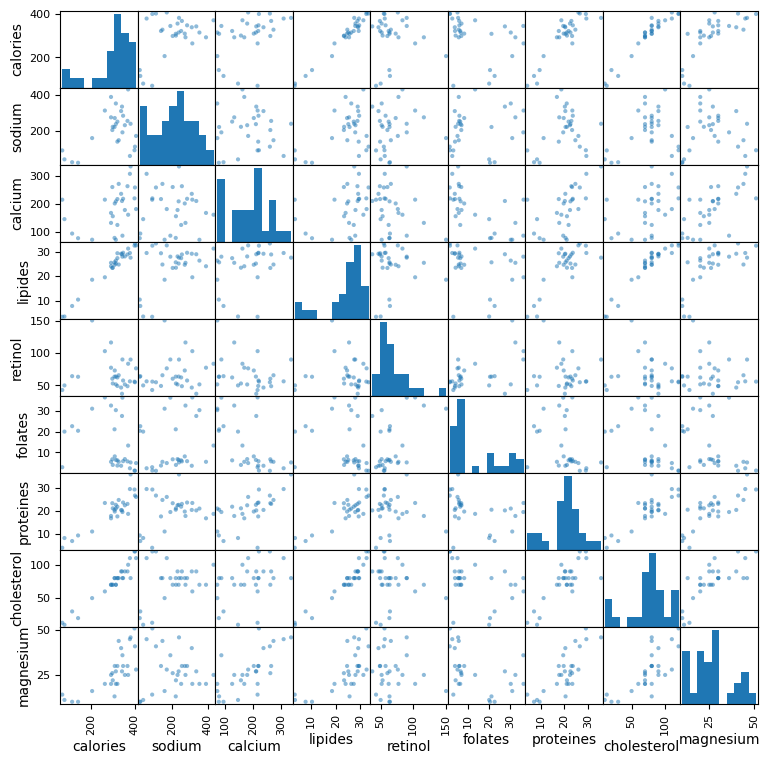

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(fromage, figsize=(9, 9))

corrélation positive entre calories et cholésterol ..

## Partie 2 : Méthode des centres mobiles


In [ ]:
import numpy as np
from sklearn import cluster
np.random.seed(0)

kmeans = cluster.KMeans(n_clusters = 4)
kmeans.fit(fromage)
# Sorting the data based on cluster labels
idk = np.argsort(kmeans.labels_)
# Displaying the sorted DataFrame with cluster labels
print(pd.DataFrame(fromage.index[idk],kmeans.labels_[idk]))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


             Fromages
0         CarredelEst
0                Tome
0         PontlEveque
0           Chabichou
0            Chaource
0         Coulomniers
0  Fr.chevrepatemolle
1            Beaufort
1         SaintPaulin
1             Cheddar
1               Comte
1                Edam
1            Emmental
1            Vacherin
1            Parmesan
2       Petitsuisse40
2  Yaourtlaitent.nat.
2      Fr.frais20nat.
2      Fr.frais40nat.
3           Maroilles
3             Morbier
3              Cantal
3           Camembert
3            Pyrenees
3           Reblochon
3          Rocquefort
3                Bleu
3             Babybel
3         Fr.fondu.45


In [ ]:
# Displaying the distance of each sample to all cluster centers
distance_to_centroids=kmeans.transform(fromage)
distances_to_centroids=pd.DataFrame(distance_to_centroids,columns=['distance to centroid 0','distance to centroid 1','distance to centroid 2','distance to centroid 3'])
distances_to_centroids['cluster']=kmeans.labels_
distances_to_centroids.index=fromage.index
distances_to_centroids

,distance to centroid 0,distance to centroid 1,distance to centroid 2,distance to centroid 3,cluster
Fromages,,,,,
CarredelEst,123.597157,285.361631,384.273010,145.469280,0
Babybel,110.546519,118.433791,303.103120,71.726811,3
Beaufort,235.256653,56.726033,349.913234,218.187927,1
Bleu,159.099847,200.304020,393.768988,45.609225,3
Camembert,141.191709,210.311383,332.434717,84.660519,3
Cantal,180.759825,111.731510,371.970767,86.999318,3
Chabichou,72.040455,182.805998,298.653003,170.261192,0
Chaource,57.862806,204.988232,311.489906,105.530372,0
Cheddar,156.415710,92.262237,348.486852,159.881517,1


On remarque que cluster 0 et cluster 3 sont proches

In [ ]:
cluster_centers = kmeans.cluster_centers_

# Creating a DataFrame to display the attributes of each cluster center
cluster_centers_df = pd.DataFrame(cluster_centers, columns=fromage.columns)

cluster_centers_df


,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
0,297.857143,239.785714,103.842857,24.914286,83.928571,23.057143,18.971429,71.428571,21.714286
1,363.875000,146.125000,257.025000,29.050000,63.600000,3.862500,26.562500,96.250000,38.875000
2,101.750000,44.750000,133.750000,6.275000,55.150000,16.475000,7.200000,18.250000,11.250000
3,329.800000,306.600000,206.820000,26.870000,64.240000,11.910000,21.080000,82.000000,27.400000


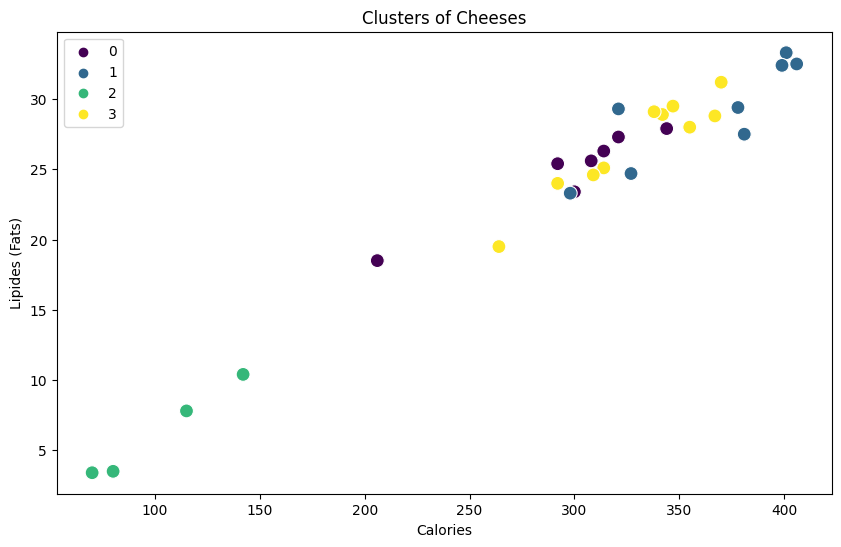

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


fromage['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x='calories', y='lipides', hue='Cluster', data=fromage, palette='viridis', s=100)
plt.title('Clusters of Cheeses')
plt.xlabel('Calories')
plt.ylabel('Lipides (Fats)')
plt.legend()
plt.show()


In [ ]:
#utilisation de la métrique "silhouette". The silhouette score is a metric that measures how well-separated the clusters are. A higher silhouette score indicates better-defined clusters. The silhouette score ranges from -1 to 1
from sklearn import metrics

res = np.arange(9, dtype ="double")

for k in np.arange(9):
 km = cluster.KMeans(n_clusters = k+2)
 km.fit(fromage)
 res[k] = metrics.silhouette_score(fromage,km.labels_)

print (res)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[0.50678769 0.37296703 0.32827797 0.35742399 0.32268402 0.28120488
 0.29450173 0.25198463 0.2500586 ]


<function matplotlib.pyplot.show(close=None, block=None)>

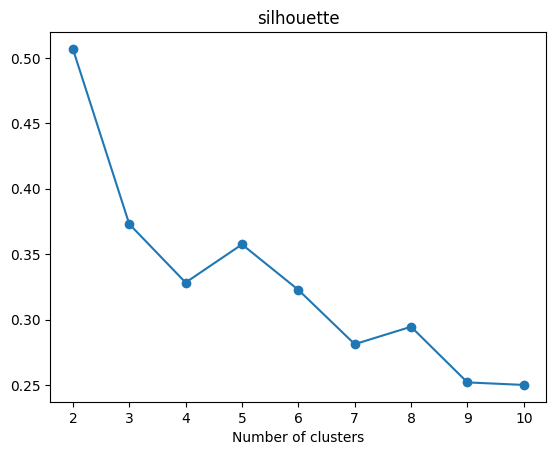

In [ ]:
import matplotlib.pyplot as plt
plt.title("silhouette")
plt.xlabel("Number of clusters")
plt.plot(np.arange(2,11,1),(res),marker='o')
plt.show

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

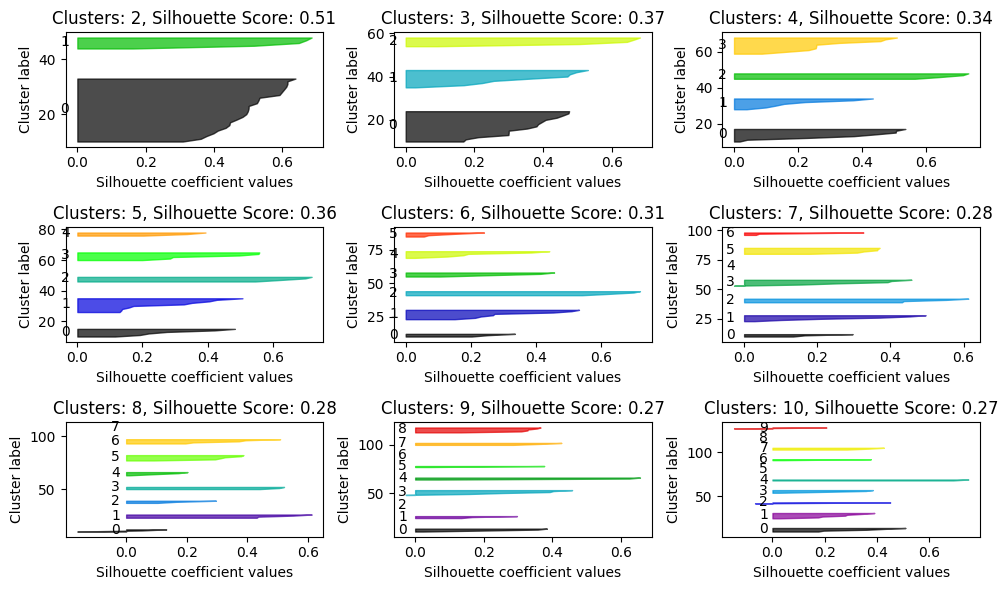

In [ ]:
from sklearn import metrics
from sklearn.metrics import silhouette_score,silhouette_samples
range_n_clusters = range(2, 11)

# Store silhouette scores for each cluster number
silhouette_scores = []

# Plot silhouette scores for different numbers of clusters
plt.figure(figsize=(10, 6))

for n_clusters in range_n_clusters:
    # Create subplot for each number of clusters
    plt.subplot(3, 3, n_clusters - 1)

    # Fit KMeans model
    km = cluster.KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = km.fit_predict(fromage)

    # Compute silhouette score
    silhouette_avg = silhouette_score(fromage, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(fromage, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(
            -0.05,
            y_lower + 0.5 * size_cluster_i,
            str(i),
            color="black",
            fontsize=10,
            verticalalignment="center",
        )

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title(f'Clusters: {n_clusters}, Silhouette Score: {silhouette_avg:.2f}')
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")

# Display average silhouette score plot
plt.tight_layout()
plt.show()


La meilleure valeur de k est 2. Mais ce n'est pas une classification équilibrée.

In [ ]:
# kmeans with k=3
import numpy as np
from sklearn import cluster
np.random.seed(0)

kmeans3 = cluster.KMeans(n_clusters = 3)
kmeans3.fit(fromage)
# Sorting the data based on cluster labels
idk = np.argsort(kmeans3.labels_)
# Displaying the sorted DataFrame with cluster labels
print(pd.DataFrame(fromage.index[idk],kmeans3.labels_[idk]))


             Fromages
0               Comte
0            Vacherin
0            Emmental
0                Edam
0             Cheddar
0            Parmesan
0         SaintPaulin
0            Beaufort
0              Cantal
1       Petitsuisse40
1  Fr.chevrepatemolle
1      Fr.frais20nat.
1      Fr.frais40nat.
1  Yaourtlaitent.nat.
2           Reblochon
2            Pyrenees
2          Rocquefort
2         PontlEveque
2                Tome
2         CarredelEst
2           Maroilles
2         Coulomniers
2            Chaource
2           Chabichou
2           Camembert
2                Bleu
2             Babybel
2             Morbier
2         Fr.fondu.45


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


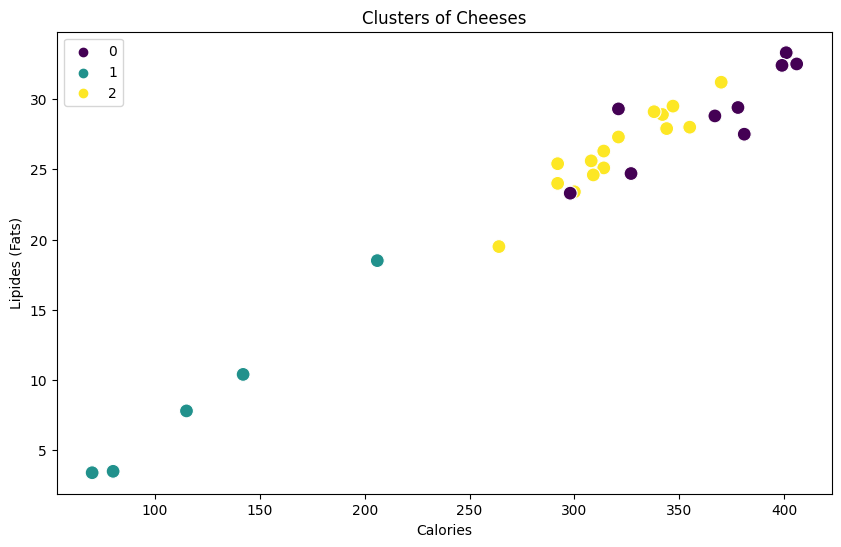

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


fromage['Cluster'] = kmeans3.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x='calories', y='lipides', hue='Cluster', data=fromage, palette='viridis', s=100)
plt.title('Clusters of Cheeses')
plt.xlabel('Calories')
plt.ylabel('Lipides (Fats)')
plt.legend()
plt.show()


## Partie 3 : Classification ascendante hiérarchique


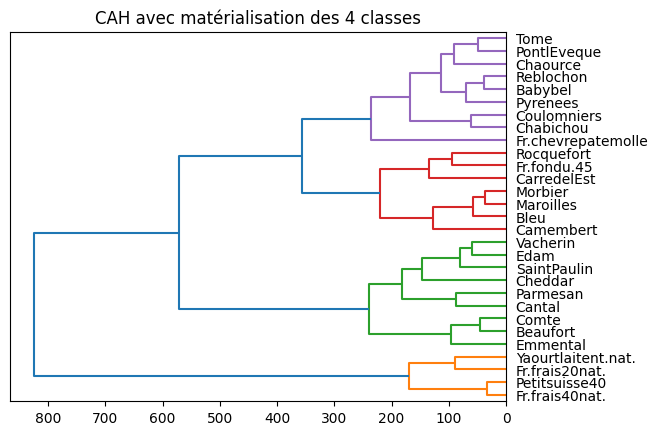

[3 4 2 3 3 2 4 4 2 2 4 2 2 4 3 1 1 3 3 2 1 4 4 4 3 2 4 2 1]
             Fromages
1  Yaourtlaitent.nat.
1       Petitsuisse40
1      Fr.frais40nat.
1      Fr.frais20nat.
2         SaintPaulin
2            Beaufort
2              Cantal
2            Parmesan
2             Cheddar
2               Comte
2                Edam
2            Emmental
2            Vacherin
3          Rocquefort
3             Morbier
3           Maroilles
3         CarredelEst
3           Camembert
3                Bleu
3         Fr.fondu.45
4         Coulomniers
4            Chaource
4           Chabichou
4         PontlEveque
4            Pyrenees
4           Reblochon
4             Babybel
4                Tome
4  Fr.chevrepatemolle


In [ ]:
""" CAH (Classification Ascendante Hiérarchique) - Hierarchical Agglomerative Clustering
Hierarchical Agglomerative Clustering is a method of cluster analysis that builds a hierarchy of clusters.
It starts by treating each observation as a single cluster and successively merges or joins the closest clusters until a single cluster
containing all observations is formed. This process results in a tree-like structure called a dendrogram, which illustrates the relationships
between clusters at different levels of similarity."""
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Z = linkage(fromage, method='ward', metric='euclidean')

# Affichage du dendrogramme
plt.title("CAH avec matérialisation des 4 classes")
dendrogram(Z, labels=fromage.index, orientation='left', color_threshold=255)
plt.show()

# Assignation des observations à des groupes en fonction de la CAH
groupes_cah = fcluster(Z, t=255, criterion='distance')
print(groupes_cah)

# Index triés des groupes
idg = np.argsort(groupes_cah)

# Affichage des observations et leurs groupes
print(pd.DataFrame(fromage.index[idg], groupes_cah[idg]))


In [ ]:
# Correspondance entre les Groupes de la CAH et les Clusters de KMeans
correspondance = pd.crosstab(groupes_cah, kmeans.labels_, rownames=['CAH Groupes'], colnames=['KMeans Clusters'])
print(correspondance)


KMeans Clusters  0  1  2  3
CAH Groupes                
1                0  0  4  0
2                0  8  0  1
3                1  0  0  6
4                6  0  0  3


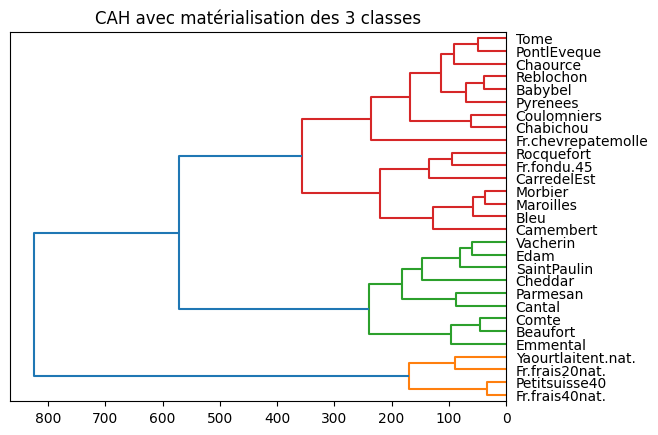

[3 3 2 3 3 2 3 3 2 2 3 2 2 3 3 1 1 3 3 2 1 3 3 3 3 2 3 2 1]
              Fromages  Groupes
0   Yaourtlaitent.nat.        1
1       Fr.frais20nat.        1
2        Petitsuisse40        1
3       Fr.frais40nat.        1
4             Vacherin        2
5             Emmental        2
6                 Edam        2
7                Comte        2
8              Cheddar        2
9               Cantal        2
10         SaintPaulin        2
11            Beaufort        2
12            Parmesan        2
13           Reblochon        3
14         PontlEveque        3
15          Rocquefort        3
16                Tome        3
17            Pyrenees        3
18         CarredelEst        3
19           Maroilles        3
20  Fr.chevrepatemolle        3
21         Coulomniers        3
22            Chaource        3
23           Chabichou        3
24           Camembert        3
25                Bleu        3
26             Babybel        3
27             Morbier        3
28         F

In [ ]:
# CAH with 3 classes
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Assuming 'fromage' is your DataFrame
Z = linkage(fromage, method='ward', metric='euclidean')

# Affichage du dendrogramme
plt.title("CAH avec matérialisation des 3 classes")
dendrogram(Z, labels=fromage.index, orientation='left', color_threshold=400)  # Set color_threshold to np.inf
plt.show()

# Assignation des observations à des groupes en fonction de la CAH avec 2 clusters
groupes_cah3 = fcluster(Z, t= 3, criterion='maxclust')
print(groupes_cah3)

# Index triés des groupes
idg = np.argsort(groupes_cah3)

# Affichage des observations et leurs groupes
result_df = pd.DataFrame({'Fromages': fromage.index[idg], 'Groupes': groupes_cah3[idg]})
print(result_df)


In [ ]:
# Correspondance entre les Groupes de la CAH et les Clusters de KMeans
correspondance3 = pd.crosstab(groupes_cah3, kmeans3.labels_, rownames=['CAH Groupes'], colnames=['KMeans Clusters'])
print(correspondance3)


KMeans Clusters  0  1   2
CAH Groupes              
1                0  4   0
2                9  0   0
3                0  1  15


## Partie 4 : Interprétation des classes


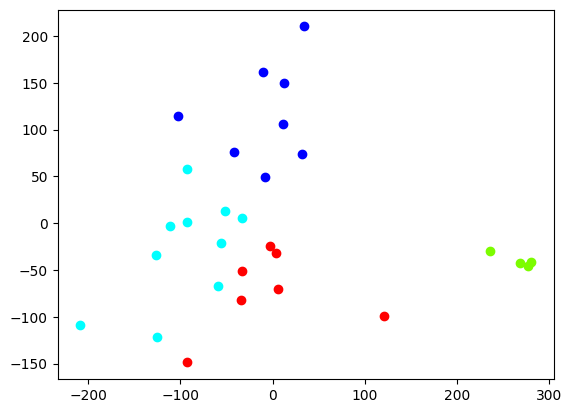

In [ ]:
from sklearn.decomposition import PCA

# Fit PCA with 2 components and transform the data
acp = PCA(n_components=2).fit_transform(fromage)  # n_components=2 specifies that we want to retain only the top 2 principal components.

# Scatter plot for visualizing clusters in PCA space
for couleur, k in zip(['red', 'blue', 'lawngreen', 'aqua'], [0, 1, 2, 3]):
    plt.scatter(acp[kmeans.labels_ == k, 0], acp[kmeans.labels_ == k, 1], c=couleur)

plt.show()


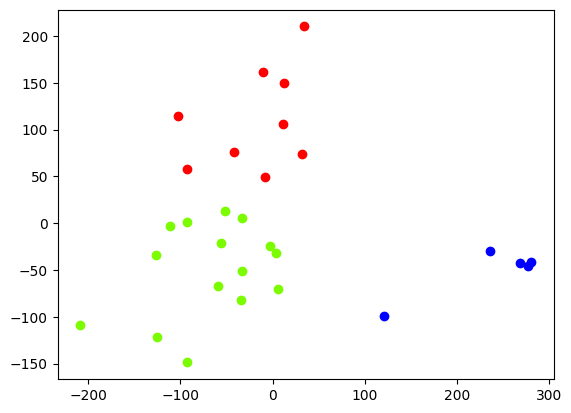

In [ ]:
from sklearn.decomposition import PCA

# Fit PCA with 2 components and transform the data
acp = PCA(n_components=2).fit_transform(fromage)  # n_components=2 specifies that we want to retain only the top 2 principal components.

# Scatter plot for visualizing clusters in PCA space
for couleur, k in zip(['red', 'blue', 'lawngreen', 'aqua'], [0, 1, 2, 3]):
    plt.scatter(acp[kmeans3.labels_ == k, 0], acp[kmeans3.labels_ == k, 1], c=couleur)

plt.show()


## Compte rendu

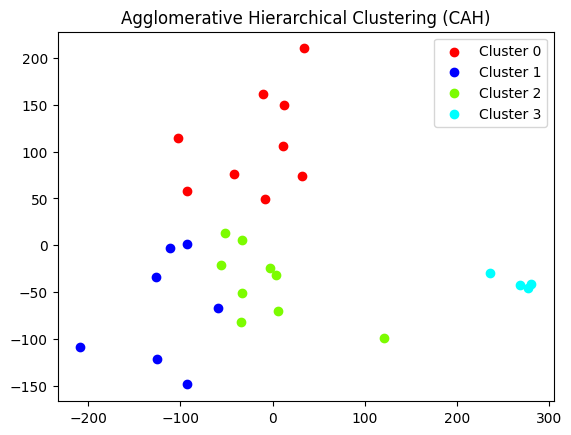

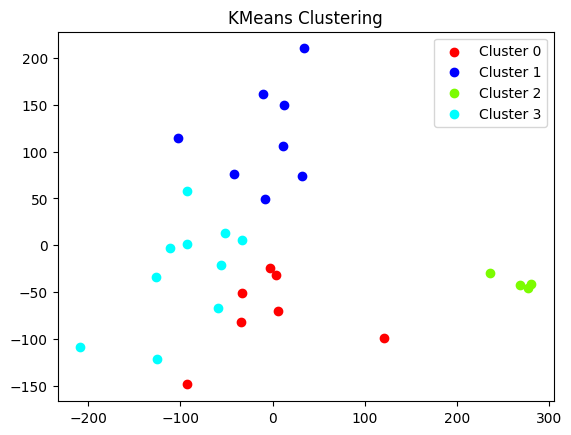

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Agglomerative Hierarchical Clustering
cah_model = AgglomerativeClustering(n_clusters=4)
cah_labels = cah_model.fit_predict(fromage)

# PCA for visualization
acp = PCA(n_components=2).fit_transform(fromage)

# Scatter plot for visualizing clusters in PCA space (CAH)
for couleur, k in zip(['red', 'blue', 'lawngreen', 'aqua'], np.unique(cah_labels)):
    plt.scatter(acp[cah_labels == k, 0], acp[cah_labels == k, 1], c=couleur, label=f'Cluster {k}')

plt.title('Agglomerative Hierarchical Clustering (CAH)')
plt.legend()
plt.show()

# Scatter plot for visualizing clusters in PCA space (KMeans, assuming 'kmeans' is your fitted KMeans model)
for couleur, k in zip(['red', 'blue', 'lawngreen', 'aqua'], [0, 1, 2, 3]):
    plt.scatter(acp[kmeans.labels_ == k, 0], acp[kmeans.labels_ == k, 1], c=couleur, label=f'Cluster {k}')

plt.title('KMeans Clustering')
plt.legend()
plt.show()


In [ ]:
from sklearn import metrics

# Silhouette score for Agglomerative Clustering
silhouette_score_cah = metrics.silhouette_score(fromage, cah_labels)

# Silhouette score for KMeans (assuming 'kmeans' is your fitted KMeans model)
silhouette_score_kmeans = metrics.silhouette_score(fromage, kmeans.labels_)

print(f"Silhouette Score (Agglomerative Clustering): {silhouette_score_cah}")
print(f"Silhouette Score (KMeans): {silhouette_score_kmeans}")


Silhouette Score (Agglomerative Clustering): 0.31558936808348614
Silhouette Score (KMeans): 0.3369935094327335


In [ ]:
# Agglomerative Hierarchical Clustering
cah_model3 = AgglomerativeClustering(n_clusters=3)
cah_labels3 = cah_model3.fit_predict(fromage)

In [ ]:
from sklearn import metrics

# Silhouette score for Agglomerative Clustering
silhouette_score_cah = metrics.silhouette_score(fromage, cah_labels3)

# Silhouette score for KMeans (assuming 'kmeans' is your fitted KMeans model)
silhouette_score_kmeans = metrics.silhouette_score(fromage, kmeans3.labels_)

print(f"Silhouette Score (Agglomerative Clustering): {silhouette_score_cah}")
print(f"Silhouette Score (KMeans): {silhouette_score_kmeans}")


Silhouette Score (Agglomerative Clustering): 0.36466024496730687
Silhouette Score (KMeans): 0.37303648367509357


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


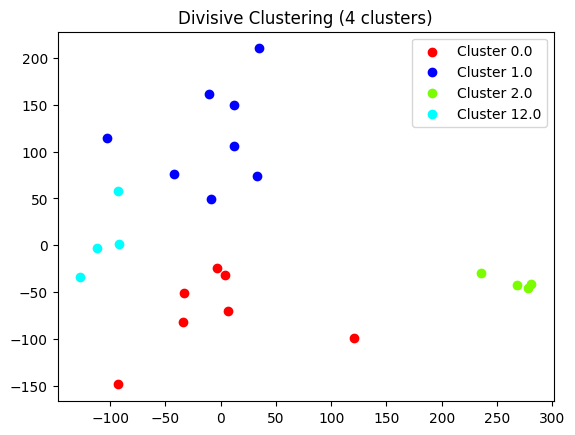

In [ ]:
""" Divisive clustering is a hierarchical clustering approach that starts with a single cluster containing all the data points
and then recursively splits the clusters into smaller sub-clusters until each cluster contains a single observation.
At each step, the algorithm identifies the cluster with the maximum variance and applies a clustering technique (in this case, KMeans)
to divide it into sub-clusters. """
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def divisive_clustering(X, k=4):
    """
    Divisive Clustering using KMeans

    Parameters:
    - X: Data matrix (numpy array or pandas DataFrame)
    - k: Number of clusters to divide into

    Returns:
    - cluster_labels: Cluster labels for each data point
    """
    # Initialize with a single cluster containing all data
    n, _ = X.shape
    cluster_labels = np.zeros(n)

    # Continue dividing until each cluster contains a single observation
    while len(np.unique(cluster_labels)) < n:
        # Find the cluster with the maximum variance
        max_var_cluster = np.argmax([np.var(X[cluster_labels == c]) for c in np.unique(cluster_labels)])

        # Apply KMeans to the cluster with maximum variance
        cluster_indices = np.where(cluster_labels == max_var_cluster)[0]

        # Check if there are enough samples for further division
        if len(cluster_indices) < k:
            break

        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X[cluster_indices])

        # Update cluster labels
        new_labels = kmeans.labels_
        for i, idx in enumerate(cluster_indices):
            cluster_labels[idx] = new_labels[i] + max_var_cluster * k  # Ensure unique labels

    return cluster_labels

# Assuming 'fromage' is your DataFrame or numpy array
# You can choose the number of clusters 'k' based on your requirements
divisive_labels = divisive_clustering(fromage.values, k=4)

# Visualize the results using PCA scatter plot
acp = PCA(n_components=2).fit_transform(fromage)
for couleur, k in zip(['red', 'blue', 'lawngreen', 'aqua'], np.unique(divisive_labels)):
    plt.scatter(acp[divisive_labels == k, 0], acp[divisive_labels == k, 1], c=couleur, label=f'Cluster {k}')

plt.title('Divisive Clustering (4 clusters)')
plt.legend()
plt.show()
